## Implimentation of Perceptron


In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING MY MODEL AS A BINARY FILE
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") # THIS IS STYLE OF GRAPHS

In [81]:
np.random.randn(3) * 1e-4

array([ 2.06448073e-05, -1.40609496e-04, -5.40779828e-05])

In [82]:
-np.ones((4, 1))

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [83]:
1e-4

0.0001

In [84]:
class Perceptron:
  def __init__(self, eta, epochs):
    self.weights = np.random.randn(3) * 1e-4 # SMALL WEIGHT INIT
    print(f"initial weights before training: \n{self.weights}")
    self.eta = eta # LEARNING RATE
    self.epochs = epochs 


  def activationFunction(self, inputs, weights):
    z = np.dot(inputs, weights) # z = W * X
    return np.where(z > 0, 1, 0) # CONDITION, IF TRUE, ELSE

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.concatenate([self.X, -np.ones((len(self.X), 1))],axis=1) # CONCATINATION
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch: {epoch}")
      print("--"*10)

      y_hat = self.activationFunction(X_with_bias, self.weights) # foward propagation
      print(f"predicted value after forward pass: \n{y_hat}")
      self.error = self.y - y_hat
      print(f"error: \n{self.error}")
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error) # backward propagation
      print(f"updated weights after epoch:\n{epoch}/{self.epochs} : \n{self.weights}")
      print("#####"*10)


  def predict(self, X):
    X_with_bias = np.concatenate([X, -np.ones((len(X), 1))],axis=1)
    return self.activationFunction(X_with_bias, self.weights)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"total loss: {total_loss}")
    return total_loss


In [85]:
def prepare_data(df):
  X = df.drop("y", axis=1)

  y = df["y"]

  return X, y

In [113]:
X

,x1,x2
0,0,0
1,0,1
2,1,0
3,1,1


In [86]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [87]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model = Perceptron(eta=ETA, epochs=EPOCHS)
model.fit(X, y)

_ = model.total_loss()


initial weights before training: 
[ 8.09583069e-06 -2.99690027e-05 -8.01528128e-06]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 0 1 0]
error: 
0   -1
1    0
2   -1
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[8.09583069e-06 2.99970031e-01 2.99991985e-01]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 3.00008096e-01  5.99970031e-01 -8.01528128e-06]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[8.09583069e-06 2.99970031e-01 8.99991985e-01]
####

In [88]:
model.predict(X)

array([0, 0, 0, 1])

In [89]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]], dtype=int64)

In [90]:
inputs = np.array([[1,1], [0,1]])
model.predict(inputs)

array([1, 0])

In [91]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df = pd.DataFrame(OR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [92]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()


initial weights before training: 
[7.54726443e-06 1.77724952e-06 3.17395307e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.60000755  0.60000178 -0.89996826]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 0.60000755  0.60000178 -0.59996826]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 0.60000755  0.60000178 -0.29996826]
#####################################

In [93]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [94]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()


initial weights before training: 
[-1.10664699e-05 -1.97915995e-05  1.07579589e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.29998893  0.29998021 -0.59998924]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-1.10664699e-05 -1.97915995e-05  1.07579589e-05]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 0.29998893  0.29998021 -0.59998924]
######################

In [95]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X = X.values # as a array
    x1 = X[:, 0] 
    x2 = X[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  #plot_dir = "plots"
  #os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  #plotPath = os.path.join(plot_dir, file_name) # model/filename
  #plt.savefig(plotPath)

In [110]:
def save_plot1(df, file_name, model):
  def _create_base_plot(df):
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):
    colors = ("red", "blue", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])

    X1 = X.values # as a array
    x1 = X1[:, 0] 
    x2 = X1[:, 1]
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(xx1)
    print(xx1.ravel())
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  #plot_dir = "plots"
  #os.makedirs(plot_dir, exist_ok=True) # ONLY CREATE IF MODEL_DIR DOESN"T EXISTS
  #plotPath = os.path.join(plot_dir, file_name) # model/filename
  #plt.savefig(plotPath)

In [96]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df = pd.DataFrame(OR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [97]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()


initial weights before training: 
[ 1.17831803e-04 -7.32228385e-05  7.13440564e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 1 0]
error: 
0    0
1    1
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.30011783  0.59992678 -0.59992866]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[ 0.30011783  0.59992678 -0.29992866]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[3.00117832e-01 5.99926777e-01 7.13440564e-05]
#########################

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


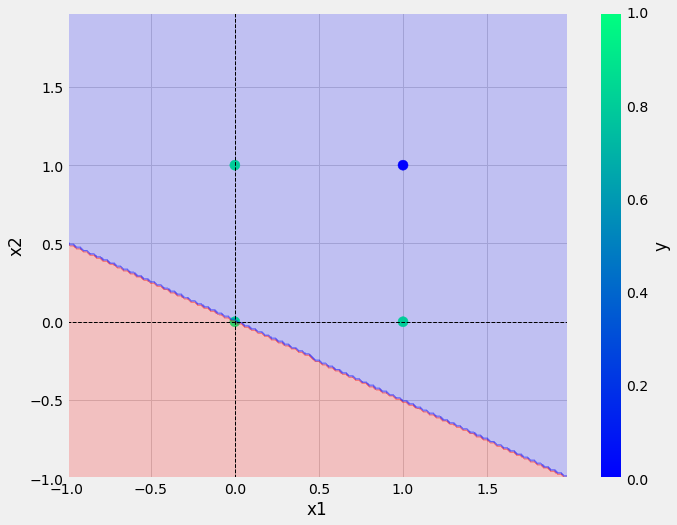

In [112]:
save_plot(df, "or.png", model_OR)

In [99]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df = pd.DataFrame(AND)

df

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [100]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()


initial weights before training: 
[-5.67009387e-05 -6.83051107e-05  4.16660832e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 0.2999433   0.29993169 -0.29995833]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-5.67009387e-05 -6.83051107e-05  6.00041666e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[0.2999433  0.29993169 0.30004167]
#########################

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


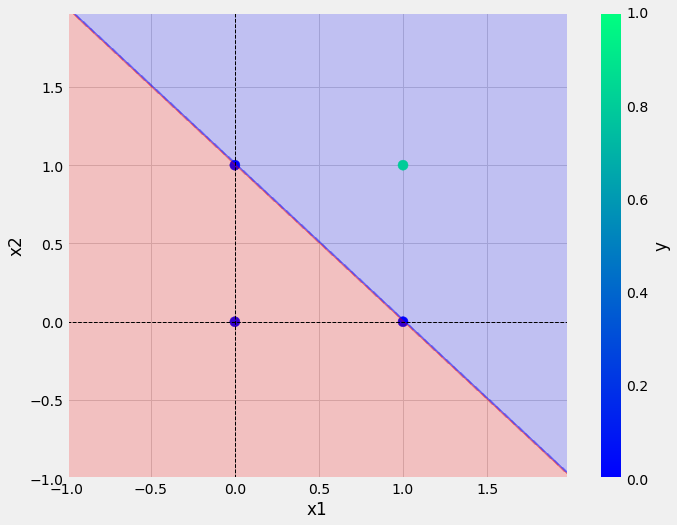

In [101]:
save_plot(df, "and.png", model_AND)

In [102]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df = pd.DataFrame(XOR)

df

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [103]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()


initial weights before training: 
[-1.11519563e-04 -2.04658535e-05 -4.37212039e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0   -1
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 2.99888480e-01 -2.04658535e-05 -4.37212039e-05]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-1.11519563e-04 -3.00020466e-01  5.99956279e-01]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 2.99888480e-01 -2.04658535e-05 -4.37212039e-05

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


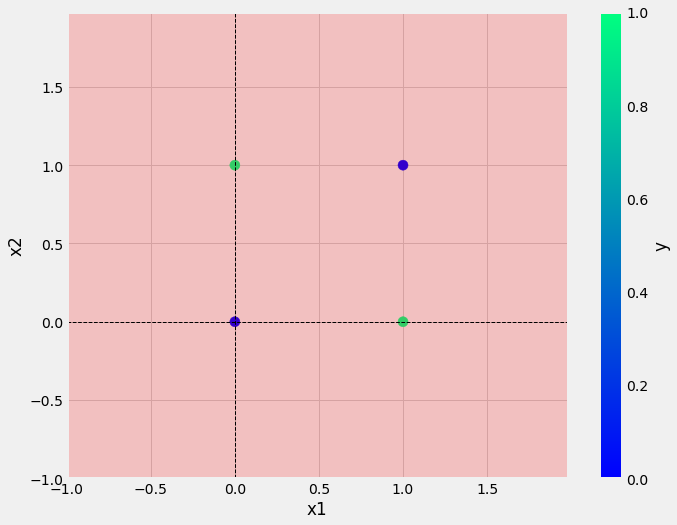

In [104]:
save_plot(df, "xor.png", model_XOR)

In [105]:
NAND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [1,1,1,0],
}

df = pd.DataFrame(NAND)

df

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [106]:
X,y = prepare_data(df)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_NAND = Perceptron(eta=ETA, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()


initial weights before training: 
[-6.19499535e-05 -1.04099403e-05 -4.45060604e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 0
--------------------
predicted value after forward pass: 
[1 1 0 0]
error: 
0    0
1    0
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
0/10 : 
[ 2.99938050e-01 -1.04099403e-05 -3.00044506e-01]
##################################################
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch:
1/10 : 
[-6.19499535e-05 -3.00010410e-01 -4.45060604e-05]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch:
2/10 : 
[ 2.99938050e-01 -1.04099403e-05 -6.00044506e-01

[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]


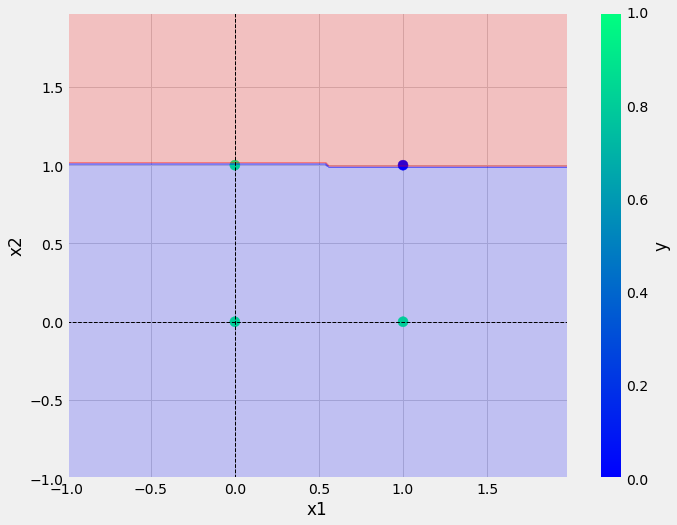

In [107]:
save_plot(df, "Nand.png", model_NAND)